In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
display(df.head())
df.shape
dfdict = pd.DataFrame(df.dtypes)
dfdict

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [3]:
dfdict['MissingVal'] = df.isnull().sum()
dfdict

,0,MissingVal
longitude,float64,0
latitude,float64,0
housing_median_age,float64,0
total_rooms,float64,0
total_bedrooms,float64,207
population,float64,0
households,float64,0
median_income,float64,0
median_house_value,float64,0
ocean_proximity,object,0


In [4]:
dfdict['NUnique'] = df.nunique()
dfdict

,0,MissingVal,NUnique
longitude,float64,0,844
latitude,float64,0,862
housing_median_age,float64,0,52
total_rooms,float64,0,5926
total_bedrooms,float64,207,1923
population,float64,0,3888
households,float64,0,1815
median_income,float64,0,12928
median_house_value,float64,0,3842
ocean_proximity,object,0,5


In [5]:
dfdict['count'] = df.count()
dfdict

,0,MissingVal,NUnique,count
longitude,float64,0,844,20640
latitude,float64,0,862,20640
housing_median_age,float64,0,52,20640
total_rooms,float64,0,5926,20640
total_bedrooms,float64,207,1923,20433
population,float64,0,3888,20640
households,float64,0,1815,20640
median_income,float64,0,12928,20640
median_house_value,float64,0,3842,20640
ocean_proximity,object,0,5,20640


In [6]:
dfdict = dfdict.rename(columns={0:'DataType'})
dfdict

,DataType,MissingVal,NUnique,count
longitude,float64,0,844,20640
latitude,float64,0,862,20640
housing_median_age,float64,0,52,20640
total_rooms,float64,0,5926,20640
total_bedrooms,float64,207,1923,20433
population,float64,0,3888,20640
households,float64,0,1815,20640
median_income,float64,0,12928,20640
median_house_value,float64,0,3842,20640
ocean_proximity,object,0,5,20640


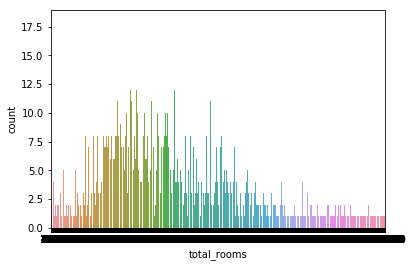

In [18]:
sn.countplot('total_rooms',data=df)

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


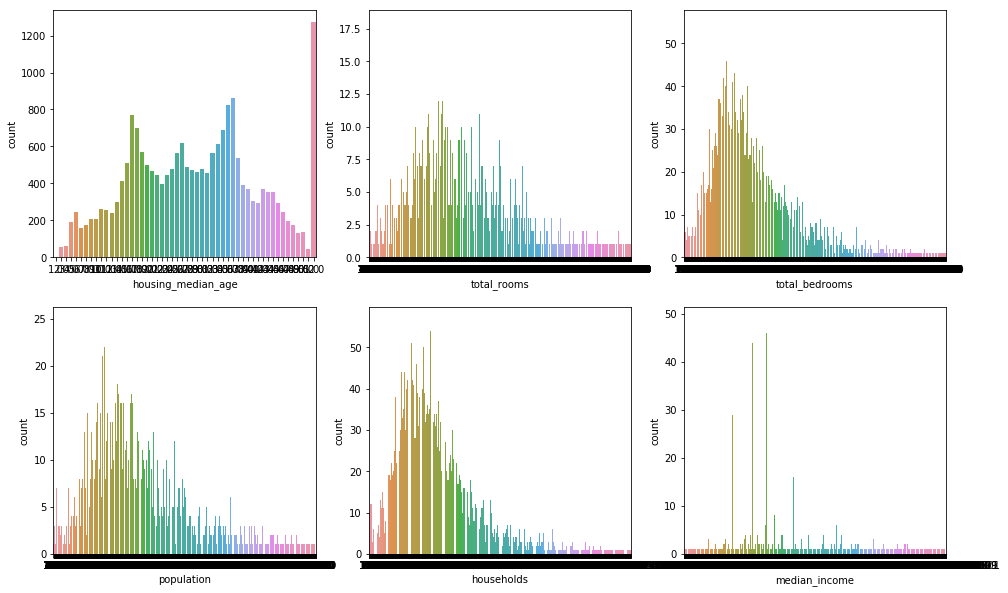

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sn.countplot('housing_median_age',data=df,ax=axes[0,0])
sn.countplot('total_rooms',data=df,ax=axes[0,1])
sn.countplot('total_bedrooms',data=df,ax=axes[0,2])
sn.countplot('population',data=df,ax=axes[1,0])
sn.countplot('households',data=df,ax=axes[1,1])
sn.countplot('median_income',data=df,ax=axes[1,2])

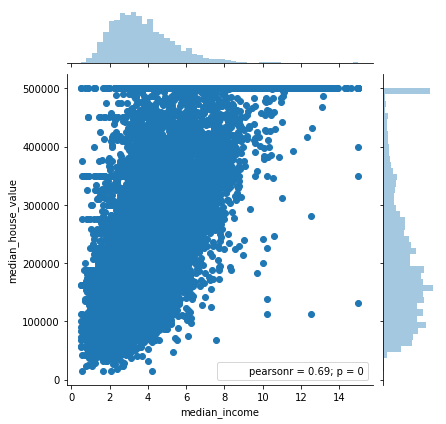

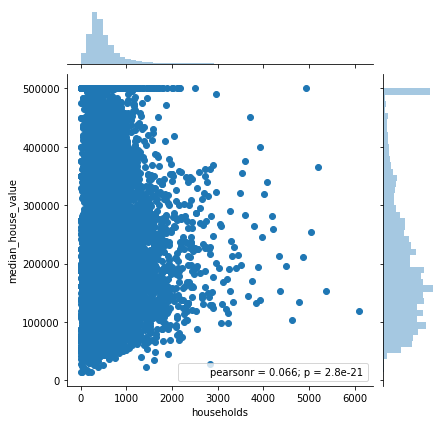

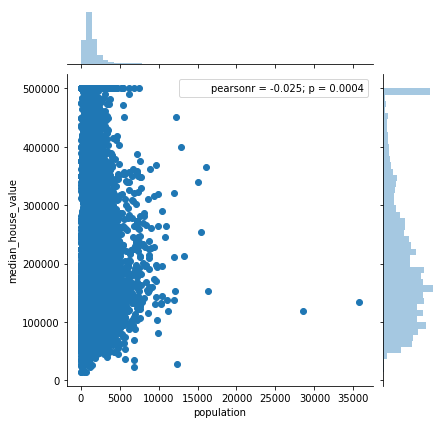

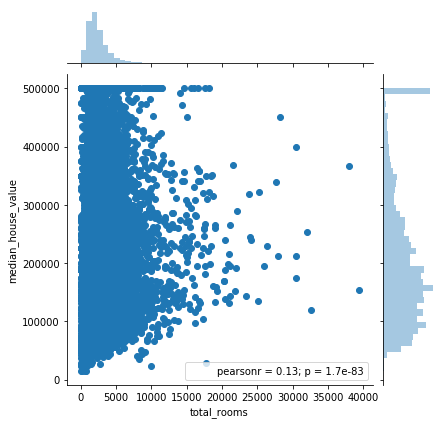

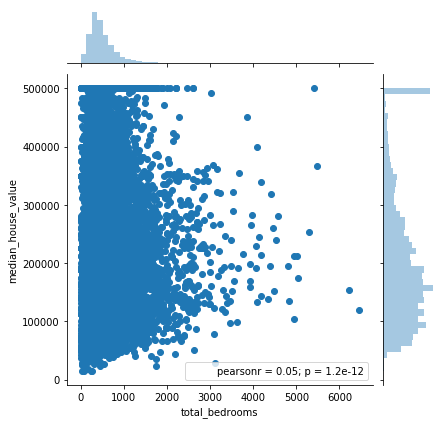

In [31]:

sn.jointplot(x='median_income',y='median_house_value',data=df)
sn.jointplot(x='households', y='median_house_value', data=df)
sn.jointplot(x='population', y='median_house_value', data=df)
# sn.jointplot(x='house_median_age',y='median_house_value',data=df)
sn.jointplot(x='total_rooms',y='median_house_value',data=df)
sn.jointplot(x='total_bedrooms',y='median_house_value',data=df)

In [8]:
cor = df.corr()
cor

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


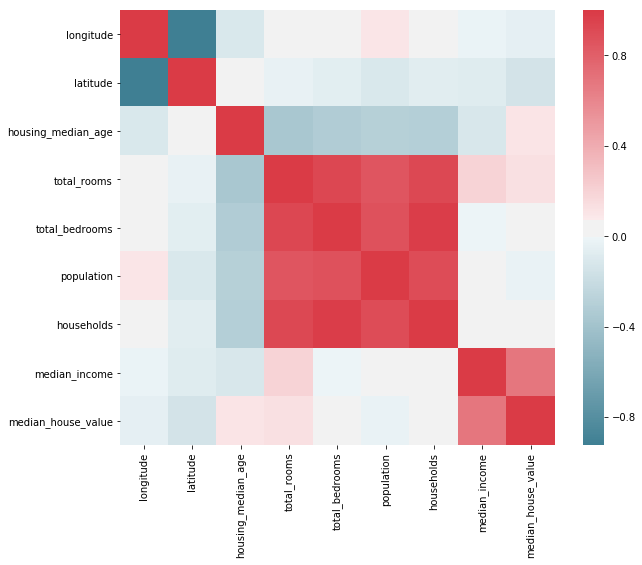

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
sn.heatmap(cor,
            mask=np.zeros_like(cor, dtype=np.bool), 
            cmap=sn.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
Train_data = df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']]
Train_data = Train_data.dropna()
Train_data.isnull().sum()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
lr = LinearRegression()
Train_data = Train_data.rename(columns={0:'age'})
# X_rooms = Train_data[['total_rooms']].values
X_bedrooms = Train_data[['median_income']].values
Y = Train_data[['median_house_value']].values

In [13]:
# lr.fit(X_rooms,Y)
lr.fit(X_bedrooms,Y)
col = ['X_bedrooms']
list(zip(col,lr.coef_))

[('X_bedrooms', array([41837.06607562]))]

In [14]:
y_pred = lr.predict(X_bedrooms)
print(np.sqrt(metrics.mean_squared_error(Y,y_pred)))

83731.92685148343


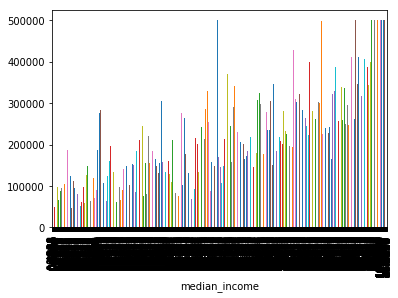

In [15]:
# Train_data.groupby('ocean_proximity')['median_house_value'].mean().plot(kind='bar')
Train_data.groupby('median_income')['median_house_value'].mean().plot(kind='bar',xlim=[0,15])

In [1]:
df.head()

NameError: name 'df' is not defined